# Import libraries

In [57]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt

# read dataset

In [2]:
df = pd.read_csv('reviews.csv')
df.head(1).T

,0
ReviewText,This product is amazing and very useful!


# check ReviewText existance

In [5]:
'ReviewText' in df.columns[0]

True

# check null entries

In [6]:
df.isna().sum()

ReviewText    0
dtype: int64

# feature extraction
1. create text length
2. create word count

In [13]:
df['TextLength'] = df.ReviewText.str.len()
df.head(1).T

,0
ReviewText,This product is amazing and very useful!
TextLength,40


In [18]:
df['WordCount'] = df.ReviewText.str.split().apply(len)
df.head(1).T

,0
ReviewText,This product is amazing and very useful!
TextLength,40
WordCount,7


# Analysing word frequencies

In [19]:
whole_text = "".join(df.ReviewText)
whole_text

'This product is amazing and very useful!I didn’t like the quality of the material.Good value for money.Terrible experience, won’t buy again.Absolutely loved it!The product broke after one week.Really happy with the performance.Not worth the price.Excellent build quality and fast delivery.Disappointing experience overall.'

In [45]:
# split text using punctuations
tokens = re.split(r'[,\.;!\?\-\s]+', whole_text)
# remove empty items
tokens = [token for token in tokens if len(token) > 0]
# count word frequencies
word_frequencies_dict = Counter(tokens)
# find frequent words
sorted_by_count = word_frequencies_dict.most_common()
sorted_by_count

[('the', 4),
 ('product', 2),
 ('and', 2),
 ('quality', 2),
 ('experience', 2),
 ('This', 1),
 ('is', 1),
 ('amazing', 1),
 ('very', 1),
 ('useful', 1),
 ('I', 1),
 ('didn’t', 1),
 ('like', 1),
 ('of', 1),
 ('material', 1),
 ('Good', 1),
 ('value', 1),
 ('for', 1),
 ('money', 1),
 ('Terrible', 1),
 ('won’t', 1),
 ('buy', 1),
 ('again', 1),
 ('Absolutely', 1),
 ('loved', 1),
 ('it', 1),
 ('The', 1),
 ('broke', 1),
 ('after', 1),
 ('one', 1),
 ('week', 1),
 ('Really', 1),
 ('happy', 1),
 ('with', 1),
 ('performance', 1),
 ('Not', 1),
 ('worth', 1),
 ('price', 1),
 ('Excellent', 1),
 ('build', 1),
 ('fast', 1),
 ('delivery', 1),
 ('Disappointing', 1),
 ('overall', 1)]

In [53]:
df = pd.DataFrame(sorted_by_count)
df.columns = ['word', 'counts']
df = df.iloc[:10]
df

,word,counts
0,the,4
1,product,2
2,and,2
3,quality,2
4,experience,2
5,This,1
6,is,1
7,amazing,1
8,very,1
9,useful,1


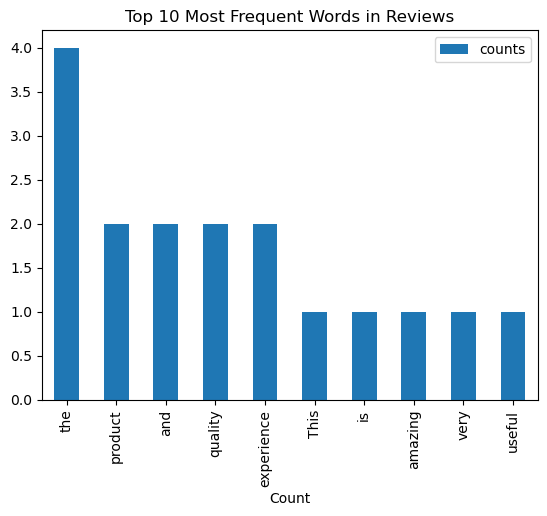

In [59]:
df.plot.bar(x='word', y='counts', title='Top 10 Most Frequent Words in Reviews')
plt.xlabel('Count')
plt.show()

# Conclusion

1. The, and, this, is and very are among most used words and they dont carry any meaning
2. No, these words do not represent any sentiment.

### **1. Regular Expressions (Regex)**

Regular expressions are patterns used to search, match, and manipulate text.
In NLP, regex helps with tasks like:

* Finding specific patterns (e.g., emails, numbers)
* Cleaning text (removing punctuation, extra spaces, symbols)
* Replacing certain character sequences

They are powerful because they allow you to describe complex text patterns using short expressions.

### **2. Tokenization**

Tokenization is the process of splitting text into smaller parts called **tokens**.
Tokens can be:

* **Words** (word tokenization)
* **Sentences** (sentence tokenization)
* **Subwords** (used in modern NLP models)

This step is essential because most NLP algorithms work on tokens, not raw text.

Example:
Text → “I love NLP.”
Word tokens → [“I”, “love”, “NLP”]

### **3. Lemmatization and Stemming**

These techniques reduce words to their **base form**, but they do it differently:

#### **Stemming**

* Cuts off word endings
* Fast but sometimes inaccurate
* Example: *“running”, “runs”, “ran” → “run” (or “runn” depending on stemmer)*

#### **Lemmatization**

* Reduces words to their dictionary/lemma form
* Considers grammar and context
* More accurate but slower
* Example: *“better” → “good”*, *“running” → “run”*

These are used for:

* Text normalization
* Improving search/retrieval
* Reducing vocabulary size

### **4. Parts of Speech (POS) Tagging**

POS tagging assigns each word a grammatical category such as:

* **Noun (N)**
* **Verb (V)**
* **Adjective (ADJ)**
* **Adverb (ADV)**
* **Pronoun (PRON)**

Example:
Sentence: **“She eats apples.”**
POS tags: **She (PRON)**, **eats (VERB)**, **apples (NOUN)**

This is important because understanding how words function in a sentence helps in:

* Parsing syntax
* Information extraction
* Text analysis
* Machine translation
